In [1]:
# install.packages("GGally")
library(tidyverse)
library(tidymodels)
library(patchwork)
# library(GGally)
# install.packages("kknn")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.4     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

# Classification of Chest Pain Using K-Nearest Neighbours

## Section 1: Introduction 

### Background Information:
Heart disease refers to a range of conditions that affect the heart. Various factors, such as age, lifestyle, and genetics can influence the chances of an individual getting heart disease. We want to understand what factors are related to certain chest pain types.

The KNN algorithm works as follows: we choose a K, or number of neighbors, for the algorithm to consider. Then, for any new observation with an unknown class, the algorithm takes the most common class of the K nearest neighbors (hence the name) to be the predicted class of the observation. 

For example, if a certain observation is of unknown class and its K nearest neighbors are all of type "Burger," then the observation will be classified as a burger!

### The Question:
Can we determine what type of chest pain a patient is likely experiencing using preexisting heart-disease related health information?

### Dataset:
The dataset that we will be using is titled “Heart Disease”.  It contains observations from various locations published as 4 experiment databases, each including the same subset of 14 attributes. For ease of reading, we chose to use the processed experiment files for our data.


## Section 2: Methods & Results

### Pre Analysis:

To read the data, we first downloaded the data set. We then looked through the files and realized that only the processed data was likely to be readable with our current knowledge, and thus chose to use the 4 processed files. The original data is from Heart Disease$^5$ in the UC Irvine Machine Learning Repository.
<br>

After reading the files and looking through the heart-disease.names file for the descriptions of each attribute, we gave the table columns appropriate names to ensure the data would be understandable.
Below is the original data with added column names:

In [2]:
hungarian_data <- read_delim("https://raw.githubusercontent.com/blu-01/DSCI-100-003-Group-21/main/proposal%20rough%20work/processed.hungarian.data", delim = ",", col_names = FALSE)
colnames(hungarian_data) <- c("age", "sex", "chest_pain_type", "rest_bp", "serum_cholesterol", "fasting_bs", "rest_ecg_results",
                             "max_heartrate", "exercise_angina", "st_depression", "slope_type", "num_coloured_flourosopy", "thal", "diagnosis")

cleveland_data <- read_delim("https://raw.githubusercontent.com/blu-01/DSCI-100-003-Group-21/main/proposal%20rough%20work/processed.cleveland.data", delim = ",", col_names = FALSE)
colnames(cleveland_data) <- c("age", "sex", "chest_pain_type", "rest_bp", "serum_cholesterol", "fasting_bs", "rest_ecg_results",
                             "max_heartrate", "exercise_angina", "st_depression", "slope_type", "num_coloured_flourosopy", "thal", "diagnosis")

switzerland_data <- read_delim("https://raw.githubusercontent.com/blu-01/DSCI-100-003-Group-21/main/proposal%20rough%20work/processed.switzerland.data", delim = ",", col_names = FALSE)
colnames(switzerland_data) <- c("age", "sex", "chest_pain_type", "rest_bp", "serum_cholesterol", "fasting_bs", "rest_ecg_results",
                             "max_heartrate", "exercise_angina", "st_depression", "slope_type", "num_coloured_flourosopy", "thal", "diagnosis")

va_data <- read_delim("https://raw.githubusercontent.com/blu-01/DSCI-100-003-Group-21/main/proposal%20rough%20work/processed.va.data", delim = ",", col_names = FALSE)
colnames(va_data) <- c("age", "sex", "chest_pain_type", "rest_bp", "serum_cholesterol", "fasting_bs", "rest_ecg_results",
                             "max_heartrate", "exercise_angina", "st_depression", "slope_type", "num_coloured_flourosopy", "thal", "diagnosis")

stacked_data <- rbind(hungarian_data, va_data, switzerland_data, cleveland_data)
head(stacked_data)

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X5, X6, X7, X8, X9, X11, X12, X13
dbl (5): X1, X2, X3, X10, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X6, X7, X8, X9, X10, X11, X12, X13
dbl (5): X1, X2, X3, X5, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or 

age,sex,chest_pain_type,rest_bp,serum_cholesterol,fasting_bs,rest_ecg_results,max_heartrate,exercise_angina,st_depression,slope_type,num_coloured_flourosopy,thal,diagnosis
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
28,1,2,130,132,0,2,185,0,0,?,?,?,0
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
30,0,1,170,237,0,1,170,0,0,?,?,6,0
31,0,2,100,219,0,1,150,0,0,?,?,?,0
32,0,2,105,198,0,0,165,0,0,?,?,?,0


Table 2.1: Loaded and Stacked Data from Web

After giving the data the correct columns, we stacked the data to make further analysis and processing easier. From the head above, it was clear that there were NA values, in this case question marks, in our data, and so we decided to summarize the number of NA values per column before proceeding.

In [3]:
editedData <- stacked_data

idx <- editedData == "?"
# replace "?" values with NA
is.na(editedData) <- idx

navalues <- colSums(is.na(editedData))
navalues

age                     sex         chest_pain_type 
                      0                       0                       0 
                rest_bp       serum_cholesterol              fasting_bs 
                     59                      30                      90 
       rest_ecg_results           max_heartrate         exercise_angina 
                      2                      55                      55 
          st_depression              slope_type num_coloured_flourosopy 
                     62                     309                     611 
                   thal               diagnosis 
                    486                       0

From this summary, it was clear that there were too many NA values for slope type, flourosopy, and thal. We decided to cut these columns from the data and then remove the remaining NA values.

In [4]:
#Removing columns with too many NA values and then removing observations with NA
editedData <- editedData |>
    select(-slope_type, -num_coloured_flourosopy, -thal) |>
    na.omit()

copyData <- editedData

We then gave the different factors descriptive names to replace their previous numeric values.

In [5]:
for(i in 1:nrow(copyData)) {       # for-loop over rows
    if(copyData$sex[i] == 1){
      copyData$sex[i] <- "Male"
    }else{
      copyData$sex[i]<- "Female"
      }
    
    if(copyData$chest_pain_type[i] == 1){
      copyData$chest_pain_type[i] <- "Typical Angina"
    }

    if(copyData$chest_pain_type[i] == 2){
      copyData$chest_pain_type[i] <- "Atypical Angina"
    }

    if(copyData$chest_pain_type[i] == 3){
      copyData$chest_pain_type[i] <- "Non-Anginal Pain"
    }

    if(copyData$chest_pain_type[i] == 4){
      copyData$chest_pain_type[i] <- "Asymptomatic"
    }

   if(copyData$diagnosis[i] == 0){
     copyData$diagnosis[i] <- "< 50% Diameter Narrowing"
   }else{
     copyData$diagnosis[i] <- "> 50% Diameter Narrowing"
   }  

    if(!is.na(copyData$rest_ecg_results[i])){
       if(copyData$rest_ecg_results[i] == 0){
          copyData$rest_ecg_results[i] <- "Normal"
             }
    
        if(copyData$rest_ecg_results[i] == 1){
          copyData$rest_ecg_results[i] <- "ST-T Wave Abnormality"
             }
    
         if(copyData$rest_ecg_results[i] == 2){
          copyData$rest_ecg_results[i] <- "Probable or Definite Left Ventricular Hypertrophy"
             }
        
        }

 if(!is.na(copyData$fasting_bs[i])){

    if(copyData$fasting_bs[i] == 0){
          copyData$fasting_bs[i] <- "False"
             }
    
    if(copyData$fasting_bs[i] == 1){
          copyData$fasting_bs[i] <- "True"
             }
     }

    
     if(!is.na(copyData$exercise_angina[i])){
        if(copyData$exercise_angina[i] == 0){
              copyData$exercise_angina[i] <- "No"
                 }
        
        if(copyData$exercise_angina[i] == 1){
              copyData$exercise_angina[i] <- "Yes"
                 }
         }

}

In [6]:
invalidzerodemo <- copyData |>
    slice_min(rest_bp)
invalidzerodemo

age,sex,chest_pain_type,rest_bp,serum_cholesterol,fasting_bs,rest_ecg_results,max_heartrate,exercise_angina,st_depression,diagnosis
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
55,Male,Non-Anginal Pain,0,0,False,Normal,155,No,1.5,> 50% Diameter Narrowing


Table 2.2: Observation With Incorrect 0 Values

We also noticed some of our numeric predictors had clearly incorrect observations with values of zero (clearly a patient did not actually have a resting blood pressure of 0). We thus removed observations with these incorrect 0 values.

In [7]:
#Removing incorrect 0 values
editedData <- editedData |>
    filter(age != 0) |>
    filter(rest_bp != 0) |>
    filter(serum_cholesterol != 0) |>
    filter(max_heartrate != 0)

In [8]:
#Changing data types
editedData <- editedData |>
    mutate(sex = as.factor(sex)) |>
    mutate(chest_pain_type = as.factor(chest_pain_type)) |>
    mutate(rest_bp = as.numeric(rest_bp)) |>
    mutate(serum_cholesterol = as.numeric(serum_cholesterol)) |>
    mutate(fasting_bs = as.factor(fasting_bs)) |>
    mutate(rest_ecg_results = as.factor(rest_ecg_results)) |>
    mutate(max_heartrate = as.numeric(max_heartrate)) |>
    mutate(exercise_angina = as.factor(exercise_angina)) |>
    mutate(st_depression = as.numeric(st_depression)) |>
    mutate(diagnosis = as.factor(diagnosis))

Finally, we corrected the data types for the different columns.

After these methods, we are left with this data!

Here is a sample of our data below which also marks the end of our tidying.

In [9]:
head(editedData)

age,sex,chest_pain_type,rest_bp,serum_cholesterol,fasting_bs,rest_ecg_results,max_heartrate,exercise_angina,st_depression,diagnosis
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>
28,1,2,130,132,0,2,185,0,0,0
29,1,2,120,243,0,0,160,0,0,0
30,0,1,170,237,0,1,170,0,0,0
31,0,2,100,219,0,1,150,0,0,0
32,0,2,105,198,0,0,165,0,0,0
32,1,2,110,225,0,0,184,0,0,0


Table 2.3: Tidied Data

We made visualizations like these for all of the predictors in the preliminary analysis, but for the sake of space, we have kept only the ones relevant to later sections.

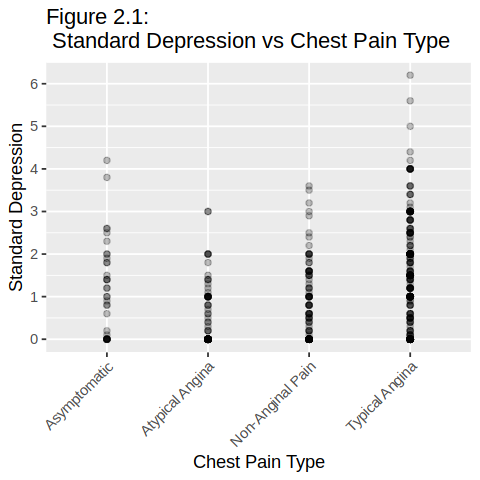

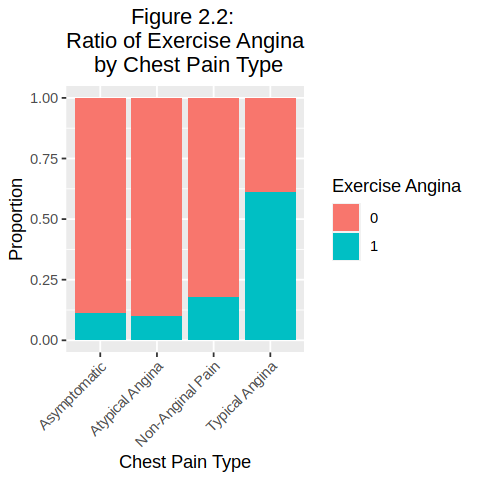

In [10]:
options(repr.plot.height = 4, repr.plot.width = 4)

PainVsDepression <- editedData |> 
    ggplot(aes(x = chest_pain_type, y = st_depression)) + 
    geom_point(alpha = 0.25) + 
    labs(x= "Chest Pain Type", title="Figure 2.1: \n Standard Depression vs Chest Pain Type") +
    scale_x_discrete(labels = c("Asymptomatic", "Atypical Angina", "Non-Anginal Pain", "Typical Angina")) +
    scale_y_continuous("Standard Depression", breaks = seq(0, 10, by = 1)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

PainVsRestECG <- editedData |>
    na.omit() |>
    ggplot(aes(x = chest_pain_type, fill = rest_ecg_results)) +
    geom_bar(position = "fill") +
    scale_x_discrete(labels = c("Asymptomatic", "Atypical Angina", "Non-Anginal Pain", "Typical Angina")) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1), plot.title = element_text(hjust = 0.5)) +    
    labs(x= "Chest Pain Type", y = "Proportion", title="Figure 2.3: \n Ratio of Resting \n ECG Measurements \n by Chest Pain Type", fill = "Resting ECG Measurement")

PainVsExerciseAngina <- editedData |>
    na.omit() |>
    ggplot(aes(x = chest_pain_type, fill = exercise_angina)) +
    geom_bar(position = "fill") +
    scale_x_discrete(labels = c("Asymptomatic", "Atypical Angina", "Non-Anginal Pain", "Typical Angina")) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1), plot.title = element_text(hjust = 0.5)) +    
    labs(x= "Chest Pain Type", y = "Proportion", title="Figure 2.2: \n Ratio of Exercise Angina \n by Chest Pain Type", fill = "Exercise Angina")

PainVsDepression
PainVsExerciseAngina

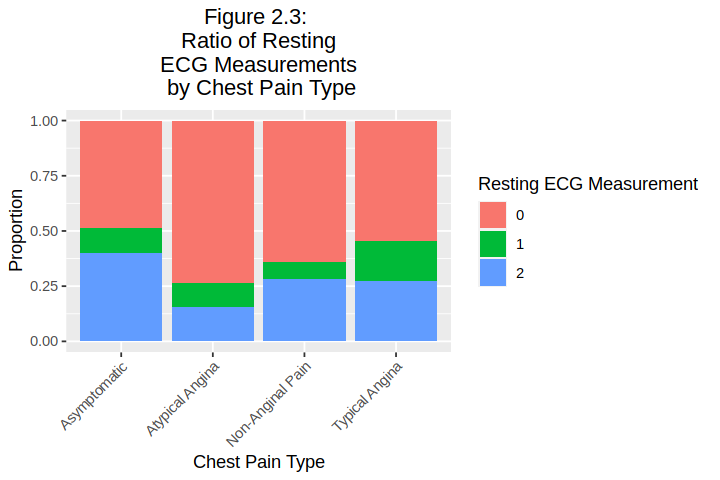

In [11]:
options(repr.plot.height = 4, repr.plot.width = 6)
PainVsRestECG

We created these visualizations to see the distribution of different values depending on chest pain type for each predictor. The implication of these visualizations will be discussed in the next section.

### Analysis Methods:

In our analysis, we will use all of the remaining factors as our predictors. We chose age, sex, blood pressure, cholesterol, and blood sugar as they were designated as major risk factors by a study on risk factors for cardiovascular disease$^1$, with blood pressure and cholesterol in particular being emphasized by the CDC$^2$. An article by Harvard$^3$ also states "Several large observational studies have indicated that a high aerobic capacity is associated with a lower risk of heart attack and death," with "maximum heart rate play\[ing\] a major role in setting your aerobic capacity." Finally, for standard depression, exercise angina and resting ECG measurements, our preliminary visualizations showed noticable distinctions between different types of chest pains in terms of the distribution of values, and so we decided these values would likely be useful for grouping neighbors.
<br>

For our final visualization, we plan on creating a scatterplot plotting Cholesterol vs Age, as these two are said to be common predictors of heart disease per Risk Factors for Coronary Artery Disease: Historical Perspectives$^1$. The colour of each point will correspond to its chest pain type and its shape will show whether our model classified the type of chest pain correctly. 

### Implementation Of Analysis Methods:

In [12]:
set.seed(100)

data_split <- initial_split(editedData, prop = 0.75, strata = chest_pain_type)
data_train <- training(data_split)
data_test <- testing(data_split) 

We first created our training/testing split with a proportion of 0.75, matching much of the work we did in class.

In [13]:
set.seed(100)

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

heart_recipe <- recipe(chest_pain_type ~ .,
                       data = data_train) |>
    step_scale(age, serum_cholesterol, rest_bp, max_heartrate, st_depression) |>
    step_center(age, serum_cholesterol, rest_bp, max_heartrate, st_depression)

heart_refold <- vfold_cv(data_train, v = 5, strata = chest_pain_type)

In [ ]:
set.seed(100)
options(repr.plot.width = 7, repr.plot.height = 6)

k_vals_wide <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

resample_results_wide <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(knn_tune) |>
    tune_grid(resamples = heart_refold, grid = k_vals_wide) |>
    collect_metrics()

cross_val_plot_wide <- resample_results_wide |>
    filter(.metric == "accuracy") |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Number of Neighbours", y = "Accuracy Estimate") + 
    ggtitle("Figure 2.4: \n Number of Neighbours vs Accuracy for Wide Range of K")

cross_val_plot_wide

We first plotted accuracy against a wide range of neighbor values using 5-fold cross validation to see which range we should look into to find the optimal neighbor count. From this chart, we decided to look more closely at the peak range of neighbors.

In [ ]:
set.seed(100)

k_vals <- tibble(neighbors = seq(from = 10, to = 30, by = 1))

resample_results <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(knn_tune) |>
    tune_grid(resamples = heart_refold, grid = k_vals) |>
    collect_metrics()

best_neighbors <- resample_results |>
    filter(.metric == "accuracy") |>
    slice_max(mean) |>
    pull(neighbors)

cross_val_plot <- resample_results |>
    filter(.metric == "accuracy") |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Number of Neighbours", y = "Accuracy Estimate") +
    ggtitle("Figure 2.5: \n Number of Neighbours vs Accuracy from K = 10 to 30")
cross_val_plot

In [ ]:
best_neighbors

The highest accuracy value for neighbors was when n = 16. However, we decided to go with n = 21 as it matched the 3 criteria for selecting a good K value:
- High accuracy (relatively speaking)
- High accuracy neighbors
- Not too computationally expensive

On the other hand, there was a clear steep drop off in accuracy on the lower end of n = 16 and so our faith that it was the best choice was not as high.

In [ ]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 21) |>
    set_engine("kknn") |>
    set_mode("classification")

heart_fit <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(knn_spec) |>
    fit(data_train)

pain_predictions <- predict(heart_fit, data_test) |>
    bind_cols(data_test)
pain_prediction_accuracy <- pain_predictions |>
    metrics(truth = chest_pain_type, estimate = .pred_class)
slice(pain_prediction_accuracy, 1)

Table 2.4: Model Accuracy on Testing Data

In [ ]:
pain_matrix <- pain_predictions |>
    conf_mat(truth = chest_pain_type, estimate = .pred_class)
pain_matrix

Table 2.5: Model Confusion Matrix on Testing Data

The accuracy of our model is about 58% when run on the testing data. Given that there are 4 classes, the accuracy for random guessing would be around 25%, meaning the predictors we have trained our model on are definitely correlated in some way to each of the chest pain types. However, an accuracy of little under 60% is still far from ideal, and if we wanted to implement this model in a real world scenario, we would likely need to give it more predictors or use a more advanced method of modeling than k-nearest neighbors. From the confusion matrix, it is notable that the least accurate prediction class by far is for Non-Anginal Pain, which is when the patient has chest pain not caused by heart disease. However, we are not exactly sure about the implications of this finding, as we do not know how important false positives or negatives are for these different chest pain types.

### Visualization Of Analysis:

In [ ]:
pain_predictions <- pain_predictions |> mutate(true = chest_pain_type == .pred_class)
plotagechlo <- pain_predictions |> ggplot(aes(x = serum_cholesterol, y = age, color = chest_pain_type, shape = true)) + geom_point() + 
labs(x = "Age", y = "Cholesterol", color = "Chest Pain Type", shape = "Predicted Pain Correctness", title = "Figure 2.6: \n Cholesterol vs Age Visualization") 
plotagechlo

In the graph above, we are trying to see if the predicted type matches the actual type. The goal of this graph is to show how our trained model fared against our real data.

We chose to use Cholesterol and Age since these are the most common causes predictors of heart disease as noted by Risk Factors for Coronary Artery Disease: Historical Perspectives$^1$.

Right now we know that the accuracy of our trained data is around 58% which is why our False and True shapes are of similar count.

## Section 3: Discussion

### What We Found:

After creating the dataset we discovered that there was no significant correlation between high fasting blood sugar and chest pain and that men were more likely to experience chest pain than women. Patients with normal resting ECG are more likely to have chest pain. Individuals with asymptomatic pain were more likely to have no exercise-induced angina, whereas those with angina were more likely to experience Atypical Angina, Non-Anginal pain, and Typical Angina pain. These findings align with our predictions because according to the National Library of Medicine, men are more likely to experience chest pain than men (4). 

These findings are essential to both the public and medical community. It can be used to improve risk assessment for patients and treatments can be prescribed based on predictors when chest pain type is not explicitly known.  These predictors aid in a more accurate treatment decreasing patient healthcare costs. 

When analyzing the relationship between standard depression and chest pain types, the data revealed noteworthy correlations. Specifically, "atypical angina" and "non-angina" showed a wider range of standard depression values than "typical angina" and "asymptomatic". Next discussing the association between chest pain type and resting electrocardiogram (ECG) measurements, a different pattern emerged. “Atypical angina” and “non-angina” showed a higher prevalence of “ST-T wave abnormalities,” whereas “asymptomatic” showed a higher prevalence of normal electrocardiogram measurements. Studying the correlation between chest pain types and exercise angina, the data show that "non-angina" has the highest proportion of non-exercise angina, while "atypical angina" has a higher proportion of exercise angina.




### Is This What We Expected:

As for expectations, these findings are consistent with expectations of different patterns of physiological indicators for different chest pain types. The observed correlations between depression, electrocardiographic measurements, and exercise-induced angina are consistent with current medical knowledge regarding the multifaceted nature of chest pain and its presentation.


### Impact Of Findings:

The implications of these findings for healthcare providers are significant. These data could improve risk assessment for patients with chest pain, leading to more tailored treatment strategies. When the type of chest pain is unknown, treatment options can be developed based on identified predictive factors. This targeted approach not only improves patient outcomes but also reduces healthcare costs by avoiding unnecessary or less effective interventions.


### Future Questions:

Looking ahead, these findings raise some future questions. Exploring the mechanisms by which each predictor affects chest pain may provide greater insight into the physiological basis of these relationships. Furthermore, the feasibility of implementing these findings in clinical settings to enhance the diagnosis and treatment of chest pain deserves further investigation. Future studies may also consider incorporating other variables or biomarkers to improve the accuracy of chest pain classification and thereby contribute to a more comprehensive understanding of this critical medical condition.


## References

1. [Risk Factors for Coronary Artery Disease: Historical Perspectives](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5686931/), Rachel Hajar, July, 2017 

2. [Heart Disease and Stroke](https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm#:~:text=Leading%20risk%20factors%20for%20heart,unhealthy%20diet%2C%20and%20physical%20inactivity.), Centers for Disease Control and Prevention, September, 2022 

3. [What is a normal heart rate?](https://www.health.harvard.edu/heart-health/what-your-heart-rate-is-telling-you), Howard LeWine, June, 2023

4. [Characteristic differences of chest pain in male and female patients with acute coronary syndrome: A pilot study. Journal of Public Health Research, 10(2)](https://doi.org/10.4081/jphr.2021.2242), Sella, Y. O., Manistamara, H., Apriliawan, S., Lukitasari, M., & Rohman, M. S., April, 2021

5. [Heart Disease](https://archive.ics.uci.edu/dataset/45/heart+disease), Andras Janosi, William Steinbrunn, Matthias Pfisterer, Robert Detrano, 1988


